In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix

print(tf.__version__)

2.0.0


In [19]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(75, 75),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(75, 75),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_generator

Found 800 images belonging to 2 classes.
Found 798 images belonging to 2 classes.


Motorbike


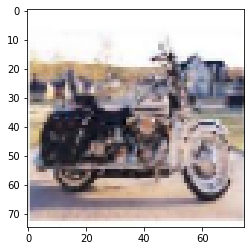

Motorbike


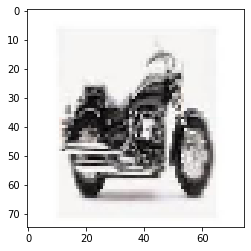

Airplane


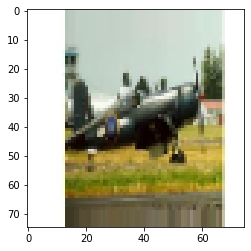

Motorbike


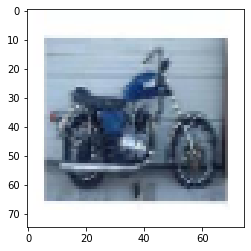

In [13]:
input_image, image_label = train_generator.next()
for i in range(4):
    image = input_image[i]
    print("Airplane" if image_label[i][0] else "Motorbike")
    plt.imshow(image)
    plt.show()

In [56]:
model = Sequential(name="object-classification")

model.add(Conv2D(32, (3, 3), input_shape=(75, 75, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.2))

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.2))

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.2))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(optimizer='sgd', 
              loss='mean_squared_error', 
              metrics=['accuracy'])

print(model.summary())

Model: "object-classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 73, 73, 32)        896       
_________________________________________________________________
activation_33 (Activation)   (None, 73, 73, 32)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               5308544   
_________________________________________________________________
activation_34 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)     

In [57]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=200,
    epochs=10,
    validation_data=validation_generator)

Epoch 1/10
200/200 [==============================] - 21s 106ms/step - loss: 0.2084 - accuracy: 0.7100 - val_loss: 0.1045 - val_accuracy: 0.8697
Epoch 2/10
200/200 [==============================] - 20s 99ms/step - loss: 0.1428 - accuracy: 0.8163 - val_loss: 0.0267 - val_accuracy: 0.9825
Epoch 3/10
200/200 [==============================] - 19s 95ms/step - loss: 0.1142 - accuracy: 0.8547 - val_loss: 0.0175 - val_accuracy: 0.9850
Epoch 4/10
200/200 [==============================] - 19s 95ms/step - loss: 0.1001 - accuracy: 0.8708 - val_loss: 0.0277 - val_accuracy: 0.9749
Epoch 5/10
200/200 [==============================] - 19s 96ms/step - loss: 0.0854 - accuracy: 0.8911 - val_loss: 0.0146 - val_accuracy: 0.9875
Epoch 6/10
200/200 [==============================] - 19s 95ms/step - loss: 0.0769 - accuracy: 0.9017 - val_loss: 0.0478 - val_accuracy: 0.9373
Epoch 7/10
200/200 [==============================] - 19s 95ms/step - loss: 0.0657 - accuracy: 0.9142 - val_loss: 0.0165 - val_accuracy

In [58]:
results = model.evaluate(test_generator)

25/25 [==============================] - 1s 55ms/step - loss: 0.0116 - accuracy: 0.9875


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


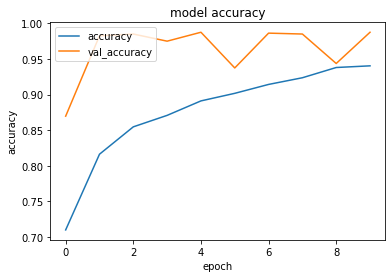

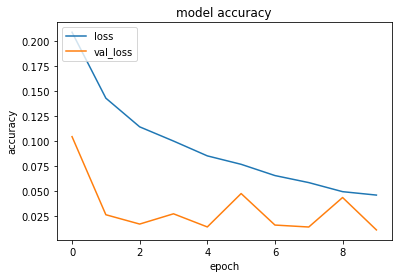

In [103]:
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [99]:
Y_pred = model.predict_generator(test_generator, 798 / (32 + 1))
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ['Airplane', 'Motorbike']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[202 198]
 [202 196]]
Classification Report
              precision    recall  f1-score   support

    Airplane       0.50      0.51      0.50       400
   Motorbike       0.50      0.49      0.49       398

    accuracy                           0.50       798
   macro avg       0.50      0.50      0.50       798
weighted avg       0.50      0.50      0.50       798



Prediction: Airplane
Correct: Airplane


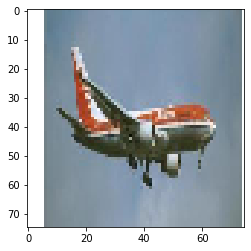

Prediction: Airplane
Correct: Airplane


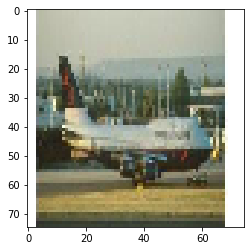

Prediction: Motorbike
Correct: Motorbike


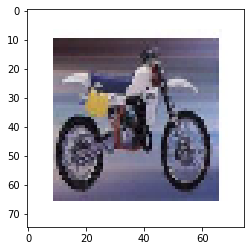

Prediction: Motorbike
Correct: Motorbike


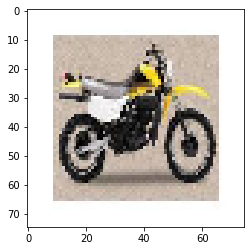

In [102]:
def prediction_check(array):
    if array[0][0] > array[0][1]:
        return "Airplane"
    else:
        return "Motorbike"

input_image, image_label = test_generator.next()
for i in range(4):
    image = input_image[i]
    predictions = model.predict(np.expand_dims(image, axis=0))
    print("Prediction: {}".format(prediction_check(predictions)))
    print("Correct: {}".format("Airplane" if image_label[i][0] else "Motorbike"))
    plt.imshow(image)
    plt.show()

In [65]:
model.save_weights('CNN.h5')